In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import data from house
house_data = pd.read_csv('House_Data.csv')

df = pd.DataFrame(house_data)
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [6]:
# handle missing data
df.isnull().sum()


area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [17]:
#inputting missing values
df.fillna(method="ffill", inplace=True)
df.isnull().sum()  # Verifying if missing values are handled

TypeError: unsupported operand type(s) for +: 'float' and 'method'

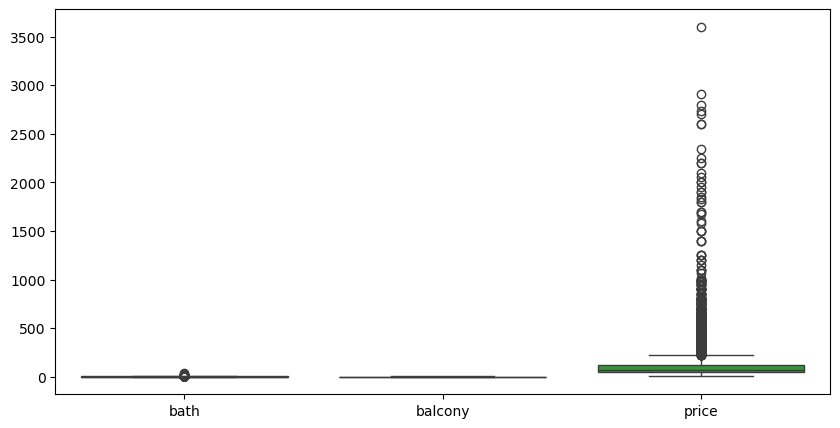

In [7]:
# Using Boxplot to visually identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

In [12]:
# Detecting outliers using the IQR method

#select only numbers
df_numerics = df.select_dtypes(include=[np.number])

Q1 = df_numerics.quantile(0.25)
Q3 = df_numerics.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numerics < (Q1 - 1.5 * IQR)) | (df_numerics > (Q3 + 1.5 * IQR)))
df_numerics[outliers].dropna()

,price
7,600.0
9,370.0
11,295.0
18,290.0
22,380.0
...,...
13306,325.0
13311,250.0
13315,231.0
13316,400.0
